In [1]:
import pandas as pd
import quandl
import math,datetime
import numpy as np
from sklearn import preprocessing,svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style

In [2]:
df = quandl.get("WIKI/GOOGL")



In [3]:
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [4]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Ex-Dividend', 'Split Ratio',
       'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume'],
      dtype='object')

In [5]:
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]

In [6]:
df["HL_PCT"] = (df["Adj. High"] - df["Adj. Close"]/df["Adj. Close"])
df["PCT_Change"] = (df["Adj. Close"] - df["Adj. Open"]/df["Adj. Open"])

In [7]:
df = df[["Adj. Close", "HL_PCT", "PCT_Change", "Adj. Volume"]]

In [8]:
forecast_col = "Adj. Close"
df.fillna(-999999,inplace=True)

In [9]:
forecast_out = int(math.ceil(0.01*len(df))) #forecasting 1% of total values inti the future

In [10]:
df["label"] = df[forecast_col].shift(-forecast_out)#shifting so that 1% ahead day's value is in the same row
df.dropna(inplace=True)#to remove the empty spaces

In [11]:
# assigning features and labels for regression
# use numpy for faster computation using arrays
X = np.array(df.drop("label", axis=1))
X = preprocessing.scale(X)
y = np.array(df["label"])

Scaling is important to bring all values to the sam scale. We usually only scale the x values.Regression trains on the sacled x to  produce the y, so it doesnt really matter if we scale the y or not. However, We must input scaled values while making predictions, otherwise problems might be caused. Also, it s a good idea to scale hthe y if the data is very spread

In [12]:
# splitting into sample and test sample
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.2) # 0.2 means 20% of data is our sample size
print(len(X_train)) # 80% is training sample
print(len(X_test)) #20% is testing sample

2711
678


Our values are future stock prices. Now, our regression model predicts the same, and it uses the features mentioned above as variables in its regression. Change the variable to check different model

In [13]:
# We use  linear regression classifier and perform linear regression with 80% sample size
clf=LinearRegression() # our classifier is linear regression
clf.fit(X_train,y_train)# fitting a regression into this data, x is feature and y is label
accuracy = clf.score(X_test,y_test)# testing if our fit is good by trying to predict the values in our test set. check how much acccuracy
print(accuracy)

0.9768566625922788


In [14]:
# We run the same model again, to see accuracy is similrar or not. It changes with sample which is random
# splitting into sample and test sample
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.2) # 0.2 means 20% of data is our sample size
print(len(X_train)) # 80% is training sample
print(len(X_test)) #20% is testing sample
clf=LinearRegression() # our classifier is linear regression
clf.fit(X_train,y_train)# fitting a regression into this data, x is feature and y is label
accuracy = clf.score(X_test,y_test)# testing if our fit is good by trying to predict the values in our test set. check how much acccuracy
print(accuracy)

2711
678
0.9779376668692942


In [15]:
# we saw accuracy changed. So one more time
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.2) # 0.2 means 20% of data is our sample size
print(len(X_train)) # 80% is training sample
print(len(X_test)) #20% is testing sample
clf=LinearRegression() # our classifier is linear regression
clf.fit(X_train,y_train)# fitting a regression into this data, x is feature and y is label
accuracy = clf.score(X_test,y_test)# testing if our fit is good by trying to predict the values in our test set. check how much acccuracy
print(accuracy)


2711
678
0.97755879235958


In [16]:
# Now we change the sampke size to see if this is better
# splitting into sample and test sample
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.1) # 0.1 means 10% of data is our sample size
print(len(X_train)) # 90% is training sample
print(len(X_test)) #10% is testing sample

3050
339


In [17]:
# We use  linear regression classifier and perform linear regression with 90% sample size
clf=LinearRegression() # our classifier is linear regression
clf.fit(X_train,y_train)# fitting a regression into this data, x is feature and y is label
accuracy = clf.score(X_test,y_test)# testing if our fit is good by trying to predict the values in our test set. check how much acccuracy
print(accuracy)

0.980915526609627


In [18]:
#One more time
# Now we change the sampke size to see if this is better
# splitting into sample and test sample
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.1) # 0.1 means 10% of data is our sample size
print(len(X_train)) # 90% is training sample
print(len(X_test)) #10% is testing sample
# We use  linear regression classifier and perform linear regression with 90% sample size
clf=LinearRegression() # our classifier is linear regression
clf.fit(X_train,y_train)# fitting a regression into this data, x is feature and y is label
accuracy = clf.score(X_test,y_test)# testing if our fit is good by trying to predict the values in our test set. check how much acccuracy
print(accuracy)

3050
339
0.9782419869814383


In [19]:
# now we use a svm regressin bevause its a different algo
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.2) # 0.2 means 20% of data is our sample size
clf=svm.SVR() # our classifier is linear regression
clf.fit(X_train,y_train)# fitting a regression into this data, x is feature and y is label
accuracy = clf.score(X_test,y_test)# testing if our fit is good by trying to predict the values in our test set. check how much acccuracy
print(accuracy)


0.8359121487014455


Now we need to actually predict the data. But we dont have new stock prices. So we'll use the empty cells that were formed when we shifetd the rows. So we'll undo all of that to create a new df.

In [20]:
df = quandl.get("WIKI/GOOGL")

df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]
df["HL_PCT"] = (df["Adj. High"] - df["Adj. Close"]/df["Adj. Close"])
df["PCT_Change"] = (df["Adj. Close"] - df["Adj. Open"]/df["Adj. Open"])
df = df[["Adj. Close", "HL_PCT", "PCT_Change", "Adj. Volume"]]

forecast_col = "Adj. Close"
df.fillna(-999999,inplace=True)

forecast_out = int(math.ceil(0.01*len(df))) #forecasting 1% of total values inti the future
df["label"] = df[forecast_col].shift(-forecast_out)#shifting so that 1% ahead day's value is in the same row

# assigning features and labels for regression
# use numpy for faster computation using arrays
X = np.array(df.drop("label", axis=1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:] # Sleecting the last 35
X = X[:-forecast_out] #sleecting everything upto the last 35

df.dropna(inplace=True)#to remove the empty spaces
y = np.array(df["label"])

#testing and trianing
clf = LinearRegression()
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.2)
clf.fit(X_train,y_train)
#print("The accuracy of this model is")
accuracy = clf.score(X_test,y_test)
#print(accuracy)

#predicting the last 35 days' value
forecast_set = clf.predict(X_lately)
#print("The forvatsr values are")
#print(forecast_set)

#plotting
last_date = df.iloc[-1].name
print(last_date)
last_unix = last_date.timestamp()
print(last_unix)
one_day = 86400
next_unix = last_unix + one_day
print(next_unix)

2018-02-05 00:00:00
1517788800.0
1517875200.0


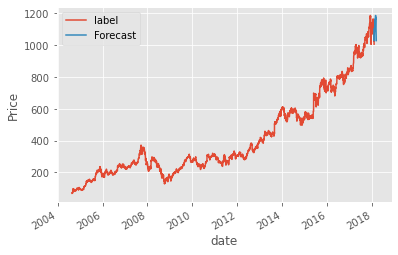

In [21]:
#plotting
style.use("ggplot")
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

df["Forecast"] =np.nan

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    df.loc[next_date] = [np.nan for x in range(len(df.columns)-1)] + [i]
    next_unix += one_day
df["label"].plot()
df["Forecast"].plot()
plt.legend()
plt.ylabel("Price")
plt.xlabel("date")
plt.show()

